In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
from functools import reduce

In [2]:
file = pd.read_excel('MasterData_Wilson.xlsx')

In [3]:
file.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,Unnamed: 29,Unnamed: 30
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,2.25,1,0,2.25,0,2.25,0.05,2.3,NaN,NaN
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,2,2,0,4,0,4,0.09,4.09,NaN,NaN
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.75,1,0,3.75,0,3.75,0.38,4.13,NaN,NaN
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,3.8,1,0,3.8,0,3.8,0.09,3.89,NaN,NaN
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,3.5,1,0,3.5,0,3.5,0.08,3.58,NaN,NaN


In [4]:
#date and time already in a datetime format 
file.dtypes

date             datetime64[ns]
time                     object
year                    float64
MonthN                  float64
Month                    object
WeekN                   float64
Day                     float64
WeekD                    object
H                       float64
Min                     float64
30min                   float64
Rtime                    object
30time                   object
H.5                     float64
Operation                object
Line Item                object
Department               object
Category                 object
Supplier                 object
Supplier Code            object
Cost                     object
Price                    object
Quantity                 object
Modifiers                object
Subtotal                 object
Discounts                object
Net Total                object
Tax                      object
Total Due                object
Unnamed: 29              object
Unnamed: 30             float64
dtype: o

In [5]:
file['Total Due'] = pd.to_numeric(file['Total Due'], errors='coerce')
del file['Unnamed: 29']
del file['Unnamed: 30']
file.columns

Index(['date', 'time', 'year', 'MonthN', 'Month', 'WeekN', 'Day', 'WeekD', 'H',
       'Min', '30min', 'Rtime', '30time', 'H.5', 'Operation', 'Line Item',
       'Department', 'Category', 'Supplier', 'Supplier Code', 'Cost', 'Price',
       'Quantity', 'Modifiers', 'Subtotal', 'Discounts', 'Net Total', 'Tax',
       'Total Due'],
      dtype='object')

In [6]:
#remove white spaces before or after words
file["Line Item"] = file["Line Item"].str.strip()

In [7]:
date_group = file.groupby(['date'])['Total Due'].sum().to_frame(name = 'count').reset_index()
file1 = file.merge(date_group)
file1.head()

,date,time,year,MonthN,Month,WeekN,Day,WeekD,H,Min,...,Cost,Price,Quantity,Modifiers,Subtotal,Discounts,Net Total,Tax,Total Due,count
0,2016-07-25,2016-07-25 09:04:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,4.0,...,1,2.25,1,0,2.25,0,2.25,0.05,2.30,831.5
1,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,2,2,0,4,0,4,0.09,4.09,831.5
2,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,3.75,1,0,3.75,0,3.75,0.38,4.13,831.5
3,2016-07-25,2016-07-25 09:28:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,28.0,...,0,3.8,1,0,3.8,0,3.8,0.09,3.89,831.5
4,2016-07-25,2016-07-25 09:29:00,2016.0,7.0,Jul,31.0,25.0,Mon,9.0,29.0,...,1.4,3.5,1,0,3.5,0,3.5,0.08,3.58,831.5


In [8]:
#Categories
file1['Line Item'].describe

<bound method NDFrame.describe of 0                    Macaron Chocolate
1                              Type in
2                                Latte
3                  Chocolate croissant
4                   Baguette tradition
5                  Chocolate croissant
6                     Almond croissant
7                  Chocolate croissant
8                              Type in
9            Almond croissant (eat in)
10                         Drip coffee
11        Chocolate croissant (eat in)
12                         Drip coffee
13                     Plain croissant
14                 Chocolate croissant
15                             Type in
16                               Latte
17            Plain croissant (eat in)
18                         Drip coffee
19                    Almond croissant
20                  Baguette tradition
21                    Almond croissant
22           Almond croissant (eat in)
23                               Latte
24                            

In [9]:
#448 different items 
department_group = file.groupby(['WeekD'])['Department'].nunique().to_frame(name = 'Department count').reset_index()
item_group = file.groupby(['Department','Line Item'])['Line Item'].nunique().to_frame(name = 'Item count').reset_index()
file1 = file.merge(department_group)
file2 = file1.merge(item_group)

item_group

,Department,Line Item,Item count
0,Bakery,Batard,1
1,Bakery,Boule,1
2,Bakery,Brioche bun,1
3,Bakery,Epi,1
4,Bakery,Levain Baguette,1
5,Bakery,Multi grain boule w seeds,1
6,Bakery,Multi grain boule without,1
7,Bakery,Multigrain baguette,1
8,Bakery,Multigrain miche,1
9,Bakery,Pretzel bun,1


In [10]:
department_group = file.groupby('WeekD')['Department'].value_counts().to_frame(name = 'Department count').reset_index()
department_group

#Sells by day
Monday_sells = department_group[department_group['WeekD'] == 'Mon']
Tuesday_sells = department_group[department_group['WeekD'] == 'Tue']
Wednesday_sells = department_group[department_group['WeekD'] == 'Wed']
Thursday_sells = department_group[department_group['WeekD'] == 'Thu']
Friday_sells = department_group[department_group['WeekD'] == 'Fri']
Saturday_sells = department_group[department_group['WeekD'] == 'Sat']
Sunday_sells = department_group[department_group['WeekD'] == 'Sun']

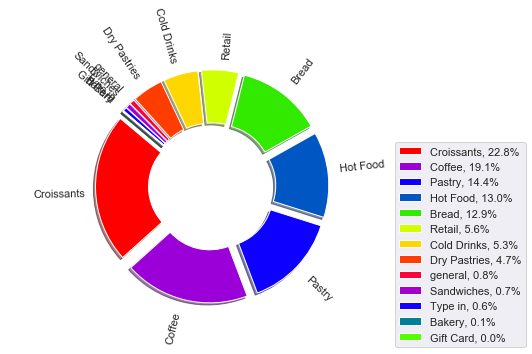

In [11]:
#Monday plot
# Data to plot
labels = Monday_sells['Department']
sizes = Monday_sells['Department count']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
total = sum(sizes)
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(labels)))

# Plot (Idea : nested pie chart)
plt.pie(sizes, explode = explode, colors=colors, labels=labels, wedgeprops=dict(width=0.5), shadow=True, startangle=140,rotatelabels=True,pctdistance=0.75)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.2, 0.8, 0.5),labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)])
plt.show()

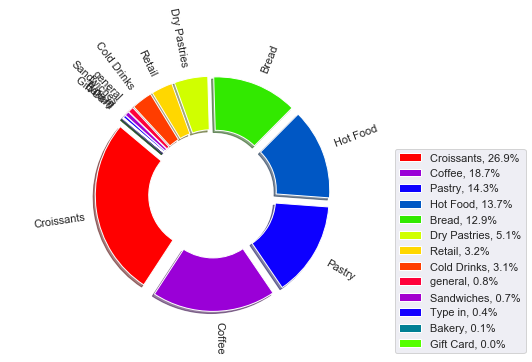

In [12]:
#Saturday plot
# Data to plot
labels = Saturday_sells['Department']
sizes = Saturday_sells['Department count']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
total = sum(sizes)
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(labels)))

# Plot (Idea : nested pie chart)
plt.pie(sizes, explode = explode, colors=colors, labels=labels, wedgeprops=dict(width=0.5), shadow=True, startangle=140,rotatelabels=True,pctdistance=0.75)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.2, 0.8, 0.5),labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)])
plt.show()

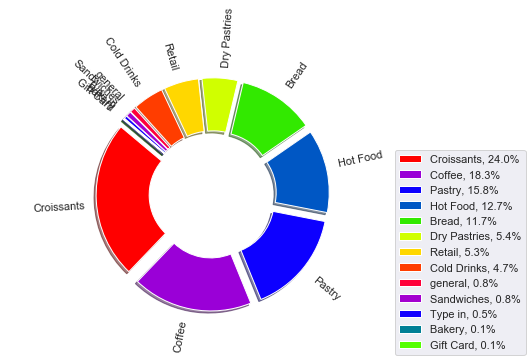

In [13]:
#Friday plot
# Data to plot
labels = Friday_sells['Department']
sizes = Friday_sells['Department count']
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
total = sum(sizes)
cmap = plt.cm.prism
colors = cmap(np.linspace(0., 1., len(labels)))

# Plot (Idea : nested pie chart)
plt.pie(sizes, explode = explode, colors=colors, labels=labels, wedgeprops=dict(width=0.5), shadow=True, startangle=140,rotatelabels=True,pctdistance=0.75)
plt.axis('equal')
plt.tight_layout()
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.2, 0.8, 0.5),labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)])
plt.show()

In [14]:
#all days with a stacked barplot
department_group_croissant = department_group[department_group['Department'] == 'Croissants']
department_group_coffee = department_group[department_group['Department'] == 'Coffee']
department_group_pastry = department_group[department_group['Department'] == 'Pastry']
department_group_hotfood = department_group[department_group['Department'] == 'Hot Food']
department_group_bread = department_group[department_group['Department'] == 'Bread']
department_group_drypastries = department_group[department_group['Department'] == 'Dry Pastries']
department_group_retail = department_group[department_group['Department'] == 'Retail']
department_group_colddrinks = department_group[department_group['Department'] == 'Cold Drinks']
department_group_general = department_group[department_group['Department'] == 'general']
department_group_sandwich = department_group[department_group['Department'] == 'Sandwiches']
department_group_typein = department_group[department_group['Department'] == 'Typein']
department_group_bakery = department_group[department_group['Department'] == 'Bakery']
department_group_giftcard = department_group[department_group['Department'] == 'Gift Card']

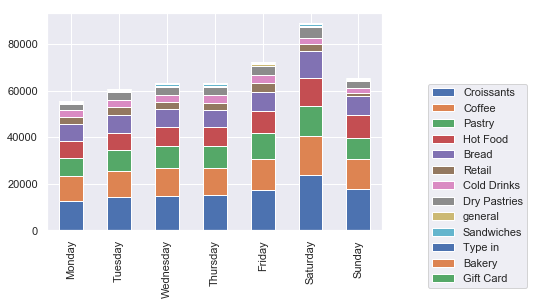

In [15]:
data_frames = [Monday_sells[['Department count','Department']], Tuesday_sells[['Department count','Department']], Wednesday_sells[['Department count','Department']], Thursday_sells[['Department count','Department']], Friday_sells[['Department count','Department']], Saturday_sells[['Department count','Department']], Sunday_sells[['Department count','Department']]]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Department'],how='inner'), data_frames)
df_merged.columns = ['Monday', 'Department','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

df_merged.set_index('Department').T.plot(kind='bar', stacked=True)
plt.legend(loc='best', bbox_to_anchor=(0.65, 0.2, 0.8, 0.5))

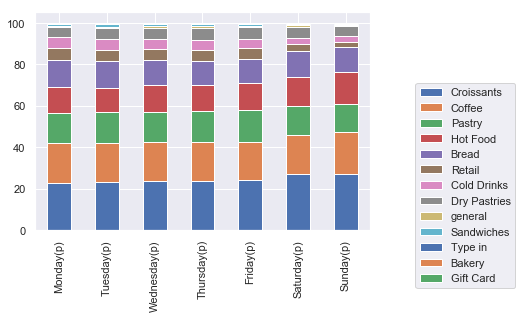

In [24]:
#100% barchart
Totals = df_merged.sum(axis=0)
Totals

df_merged['Monday(p)'] = df_merged['Monday']/55345 * 100
df_merged['Tuesday(p)'] = df_merged['Tuesday']/60863 * 100
df_merged['Wednesday(p)'] = df_merged['Wednesday']/63173 * 100
df_merged['Thursday(p)'] = df_merged['Thursday']/63177 * 100
df_merged['Friday(p)'] = df_merged['Friday']/72216 * 100
df_merged['Saturday(p)'] = df_merged['Saturday']/88924 * 100
df_merged['Sunday(p)'] = df_merged['Sunday']/65184 * 100

df_merged_percent = df_merged.ix[:,['Department','Monday(p)','Tuesday(p)','Wednesday(p)','Thursday(p)','Friday(p)','Saturday(p)','Sunday(p)']]

df_merged_percent.set_index('Department').T.plot(kind='bar', stacked=True)
plt.legend(loc='best', bbox_to_anchor=(0.65, 0.2, 0.8, 0.5))

plt.savefig('Type_of_item_sold_per_day_percentage.tif',bbox_inches = 'tight',dpi=600)
#More Hot Food and Croissant are sold over the weekend than the rest of the week (but stays relatively similar)


In [17]:
#Items that generates the most Total value (we can later calculate the amount cost versus sold)
single_item_group = file.groupby(['Line Item'])['Total Due'].sum().to_frame(name = 'item sum').reset_index()
single_item_group = single_item_group.sort_values(['item sum'],ascending=False)
single_item_group.head()

,Line Item,item sum
88,Chocolate croissant,203852.04
303,Plain croissant,177014.09
35,Baguette tradition,156040.62
174,Ham&Cheese croissant,101363.86
8,Almond croissant,94812.50


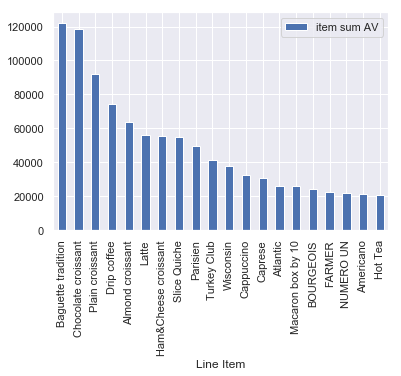

In [26]:
#Items that are the most valuable
file['Price'] = pd.to_numeric(file['Price'], errors='coerce')
file['Cost'] = pd.to_numeric(file['Cost'], errors='coerce')

file['added value'] = file['Price'] - file['Cost']
#Noticed one mistake Parisien = Le Parisian
file["Line Item"] = file["Line Item"].replace({"Le Parisian": "Parisien"})

single_item_added_value_group = file.groupby(['Line Item'])['added value'].sum().to_frame(name = 'item sum AV').reset_index()
single_item_added_value_group = single_item_added_value_group.sort_values(['item sum AV'],ascending=False)
best_20 = single_item_added_value_group.head(20).set_index('Line Item')

best_20_plot = best_20.plot(kind='bar')

plt.savefig('best_added_value_items.tif',bbox_inches = 'tight',dpi=600)


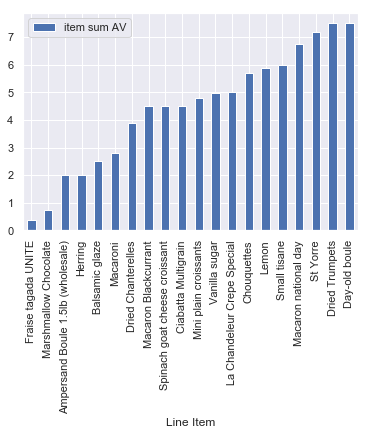

In [19]:
#Less valuable = here it is a lot of mis typed products
single_item_added_value_group = single_item_added_value_group[single_item_added_value_group['item sum AV'] != 0]
single_item_added_value_group = single_item_added_value_group.sort_values(['item sum AV'],ascending=True)
worst_20 = single_item_added_value_group.head(20).set_index('Line Item')

worst_20.plot(kind='bar')